## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [1]:
! git clone https://github.com/ds4e/knn

Cloning into 'knn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 63 (delta 16), reused 10 (delta 10), pack-reused 42 (from 1)
Receiving objects: 100% (63/63), 24.29 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (16/16), done.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is used when the target variable is continuous, meaning the output is a real-valued number. Classification is used when the target variable is categorical, meaning the output is a discrete class label.
2. A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of actual vs. predicted classifications across different categories. What it helps us understand:
- Accuracy, Precision, Recall, F1-score
- The trade-off between false positives and false negatives
- Whether the model is biased towards a particular class
3. The SSE quantifies the total squared difference between actual and predicted values in a regression mode
4. Overfitting is when the model learns the training data too well, including noise and irrelevant patterns, leading to poor generalization to new data.
Underfitting is when the model is too simple to capture the patterns in the data, leading to poor performance on both training and test data.
5. It prevents overfitting by ensuring the model generalizes well, allows for fine-tuning of hyperparameters, and helps select the best model without relying only on training performance, which might be misleading.
6. Class Label Strengths: Simple and easy to interpret. Useful when a definite decision is required. Class Label Weaknesses: Lacks confidence information. Doesn’t allow for uncertainty handling. Probability Disrbution Strengths: Provides confidence scores (e.g., 80% probability for class A, 20% for class B).
Useful in applications requiring risk assessment or threshold tuning. Probability Disrbution Weaknesses: Harder to interpret for non-experts.
May require additional decision thresholds to convert probabilities into class labels.


**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [9]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load data
df = pd.read_csv('/content/knn/data/land_mines.csv')

# Explore data
print(df.head())
print(df.info())
print(df.describe())

# Check class distribution
print(df['mine_type'].value_counts())

# Split into features and target
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']


    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB
None
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000 

In [10]:
#2
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (50%) and testing (50%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, stratify=y, random_state=42)


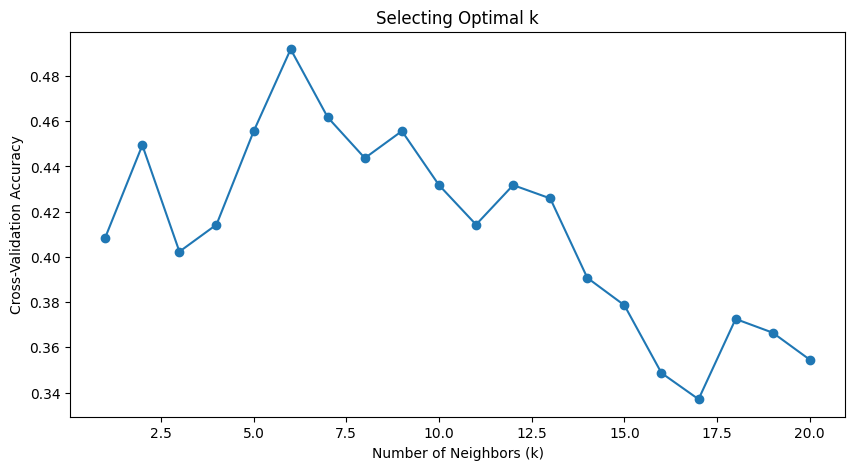

KNeighborsClassifier(n_neighbors=6)

In [13]:
#3
# Find optimal k using cross-validation
k_range = range(1, 21)
k_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy').mean() for k in k_range]
# Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Selecting Optimal k')
plt.show()

# Choose best k and train model
best_k = k_range[np.argmax(k_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

3. To pick the optimal k value We test values of k from 1 to 20 to observe how performance changes. We use 5-fold cross-validation on the training set to compute accuracy for each k. This prevents overfitting to a specific training set split. We plot accuracy vs. k and select the k that gives the highest cross-validation accuracy.

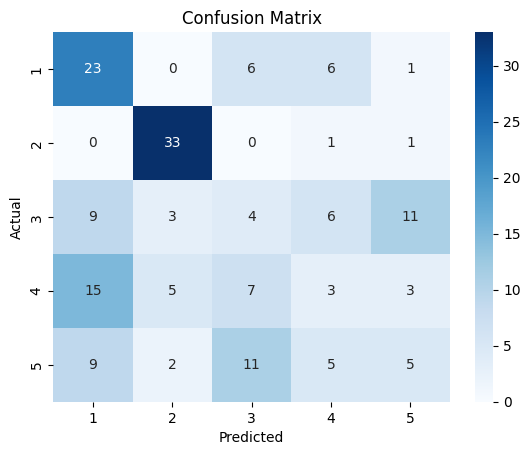

              precision    recall  f1-score   support

           1       0.41      0.64      0.50        36
           2       0.77      0.94      0.85        35
           3       0.14      0.12      0.13        33
           4       0.14      0.09      0.11        33
           5       0.24      0.16      0.19        32

    accuracy                           0.40       169
   macro avg       0.34      0.39      0.36       169
weighted avg       0.35      0.40      0.36       169



In [14]:
#4
# Predictions
y_pred = knn.predict(X_test)

# Evaluate with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


4. Overall accuracy is calculated by Accuracy = Correct Predictions/Total Predictions. This seems to be 75/148 which is approximately 50.7%. This suggests that the classifier has moderate accuracy, but there is room for improvement.Best Performance: Class 2 has the highest accuracy with 33 correct predictions and only 2 misclassifications. Class 1 is also relatively well-classified, with 23 correct out of 36 total. lass 4 and Class 5 are frequently misclassified. Class 4 is often predicted as Class 1 (15 times), which suggests some similarity in features between these classes. Class 3 has significant errors, often being confused with Class 1 and Class



5. This k-NN classification model shows moderate accuracy (~50.7%), with certain mine types being predicted more accurately than others. However, the confusion matrix highlights significant misclassification errors, meaning it’s crucial to use this model carefully in real-world applications, especially in humanitarian demining or defense operations. This Model should be used as a screening tool, not a standalone decision maker. This model should assist human experts rather than replace them.Predictions should be verified with additional testing. The current model can be useful in prioritizing areas for mine removal efforts, but it should not be relied upon in isolation. Human oversight, additional safety protocols, and supplementary data sources are critical for safe and effective landmine classification.





**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.